# reason
Dec 22, 2020


K-means seems to work better than fuzzy-c-means, and it seems that k-means groups all the broad ones into a single cluster. It is not
hard to understand because each column more or less represent a unique word (after SVD truncated), and if a broad app contain
many common words, it will have more or less same distance to all the unique words (features), so it will be clustered together
with apps who are also equi-distant to all the features (words), aka broad apps. Similarly, the small clusters usually contain
apps sharing very unique words (such as guitar) that are not common in other apps.

The reason to start a new jupyter notebook here is to confirm my guess, and some articles say using cosine distance
is better than Euclidean distance for document based clustering. And there are many more types of clustering algorithms,
I need to find out which one best serve my purpose of distinguishing niche apps from broad ones.

# prepare documents
Each single document is the string of an app's description (panels combined).

In [2]:
%matplotlib inline
%run -i '0_paths.py'
%run -i '4_natural_language_processing.py'
initial_panel = '201908'
doc_df = combine_descriptions_into_str(
    open_file_func=open_merged_df,
    initial_panel=initial_panel,
    text_column_name='description',
    panels_with_text=['202003','202004','202009','202010','202011'])
print(doc_df.shape)
doc_df.sample(n=1)




(11945, 1)


,description_all_panels
com.altec.shsm,"b'The Altec Smart Security System app allows you to easily connect and control your Live Video IP Cameras via any mobile device from anywhere and to setup your Live Voice Speakers to control your smart home with your voice.\r\n\r\nWith the Altec Smart Security System app, you can see what is going on in your home 24/7. Get automatic alerts from your Live Video IP Cameras on motion and sound detection events. The Speakers section is the entry point for the quick start guide and user manual for your Live Voice Speakers.'b'The Altec Smart Security System app allows you to easily connect and control your Live Video IP Cameras via any mobile device from anywhere and to setup your Live Voice Speakers to control your smart home with your voice.\r\n\r\nWith the Altec Smart Security System app, you can see what is going on in your home 24/7. Get automatic alerts from your Live Video IP Cameras on motion and sound detection events. The Speakers section is the entry point for the quick start guide and user manual for your Live Voice Speakers.'b'The Altec Smart Security System app allows you to easily connect and control your Live Video IP Cameras via any mobile device from anywhere and to setup your Live Voice Speakers to control your smart home with your voice.\r\n\r\nWith the Altec Smart Security System app, you can see what is going on in your home 24/7. Get automatic alerts from your Live Video IP Cameras on motion and sound detection events. The Speakers section is the entry point for the quick start guide and user manual for your Live Voice Speakers.'b'The Altec Smart Security System app allows you to easily connect and control your Live Video IP Cameras via any mobile device from anywhere and to setup your Live Voice Speakers to control your smart home with your voice.\r\n\r\nWith the Altec Smart Security System app, you can see what is going on in your home 24/7. Get automatic alerts from your Live Video IP Cameras on motion and sound detection events. The Speakers section is the entry point for the quick start guide and user manual for your Live Voice Speakers.'b'The Altec Smart Security System app allows you to easily connect and control your Live Video IP Cameras via any mobile device from anywhere and to setup your Live Voice Speakers to control your smart home with your voice.\r\n\r\nWith the Altec Smart Security System app, you can see what is going on in your home 24/7. Get automatic alerts from your Live Video IP Cameras on motion and sound detection events. The Speakers section is the entry point for the quick start guide and user manual for your Live Voice Speakers.'"


# TF-IDF

In [3]:
%run -i '4_natural_language_processing.py'
pipe = Pipeline(steps = [('tfidf',
                            TfidfVectorizer(
                            stop_words='english',
                            strip_accents='unicode',
                            max_features=2000))])
matrix = pipe.fit_transform(doc_df['description_all_panels'])
print(type(matrix))
# transform the matrix to matrix dataframe
matrix_df = pd.DataFrame(matrix.toarray(),
                         columns=pipe['tfidf'].get_feature_names())
matrix_df['app_ids'] = doc_df.index.tolist()
matrix_df.set_index('app_ids', inplace=True)
matrix_df.sample(2)



<class 'scipy.sparse.csr.csr_matrix'>


000        10  \
app_ids                                                                      
com.canva.editor                                        0.018206  0.000000   
jp.ne.ibis.ibispaintx.app                               0.000000  0.000000   
com.adobe.spark.post                                    0.000000  0.000000   
com.sec.penup                                           0.000000  0.000000   
com.doodle.master.draw.glow.art                         0.000000  0.000000   
...                                                          ...       ...   
com.sparklingsocietytycoon.paradisecityislandsim        0.000000  0.000000   
com.budgestudios.MyLittlePonyHarmonyQuest               0.000000  0.000000   
com.budgestudios.googleplay.MyLittlePonyRainbowRunners  0.000000  0.000000   
letsfarm.com.playday                                    0.000000  0.000000   
com.sparklingsociety.cityisland4                        0.000000  0.025314   

                                                             100  1000   11  \
app_ids                                                                       
com.canva.editor                                        0.000000   0.0  0.0   
jp.ne.ibis.ibispaintx.app                               0.000000   0.0  0.0   
com.adobe.spark.post                                    0.000000   0.0  0.0   
com.sec.penup                                           0.000000   0.0  0.0   
com.doodle.master.draw.glow.art                         0.000000   0.0  0.0   
...                                                          ...   ...  ...   
com.sparklingsocietytycoon.paradisecityislandsim        0.032239   0.0  0.0   
com.budgestudios.MyLittlePonyHarmonyQuest               0.000000   0.0  0.0   
com.budgestudios.googleplay.MyLittlePonyRainbowRunners  0.000000   0.0  0.0   
letsfarm.com.playday                                    0.144731   0.0  0.0   
com.sparklingsociety.cityisland4                        0.000000   0.0  0.0   

                                                         12   13   14   15  \
app_ids                                                                      
com.canva.editor                                        0.0  0.0  0.0  0.0   
jp.ne.ibis.ibispaintx.app                               0.0  0.0  0.0  0.0   
com.adobe.spark.post                                    0.0  0.0  0.0  0.0   
com.sec.penup                                           0.0  0.0  0.0  0.0   
com.doodle.master.draw.glow.art                         0.0  0.0  0.0  0.0   
...                                                     ...  ...  ...  ...   
com.sparklingsocietytycoon.paradisecityislandsim        0.0  0.0  0.0  0.0   
com.budgestudios.MyLittlePonyHarmonyQuest               0.0  0.0  0.0  0.0   
com.budgestudios.googleplay.MyLittlePonyRainbowRunners  0.0  0.0  0.0  0.0   
letsfarm.com.playday                                    0.0  0.0  0.0  0.0   
com.sparklingsociety.cityisland4                        0.0  0.0  0.0  0.0   

                                                        150   16   18   20  \
app_ids                                                                      
com.canva.editor                                        0.0  0.0  0.0  0.0   
jp.ne.ibis.ibispaintx.app                               0.0  0.0  0.0  0.0   
com.adobe.spark.post                                    0.0  0.0  0.0  0.0   
com.sec.penup                                           0.0  0.0  0.0  0.0   
com.doodle.master.draw.glow.art                         0.0  0.0  0.0  0.0   
...                                                     ...  ...  ...  ...   
com.sparklingsocietytycoon.paradisecityislandsim        0.0  0.0  0.0  0.0   
com.budgestudios.MyLittlePonyHarmonyQuest               0.0  0.0  0.0  0.0   
com.budgestudios.googleplay.MyLittlePonyRainbowRunners  0.0  0.0  0.0  0.0   
letsfarm.com.playday                                    0.0  0.0  0.0  0.0   
com.sparklingsociety.cityisland4                        0.0  0.0  0

In [4]:
# check whether the index of matrix_df matches to its topic words as the original doc_df
print('this is doc_df shape, app id and topic words:')
print(matrix_df.shape)
n = doc_df.sample(n=1).index.to_native_types()
print(n)
print(doc_df.loc[n, 'description_all_panels'])
print()
print('first slice out matrix_df with the index app id and transpose it')
tfidf = matrix_df.loc[n].T
print(tfidf.shape)
print()
print('then filter the column with only none-zero terms, see if this matches to doc_df')
none_zero_tfidf = tfidf.loc[(tfidf != 0).all(axis=1), :] # filter out rows containing 0s
print(none_zero_tfidf.shape)
print(none_zero_tfidf.dtypes)
print(none_zero_tfidf)
# it shows matrix_df is correct with its index (app-ids).

this is doc_df shape, app id and topic words:
(11945, 2000)
['com.hudway.online']
com.hudway.online    b"HUDWAY Go is a simple GPS navigation app for drivers. \r\nIt keeps it very intuitive and non-distracting, displaying just the outline of the road youre driving and your next manoeuvre. \r\n\r\nFeatures:\r\n- Intuitive 3D map, simple navigation\r\n- Voice Assistance\r\n- Long tap on the map to set the destination\r\n- Search for addresses and POI\r\n- Choose alternative routes\r\n- Drive offline right after you start\r\n- The app will recalculate the route if you leave it\r\n- Classic GPS map navigation mode\r\n- Head-up display (HUD) mode\r\n- Trip info: ETA, speed, distance traveled, directions on the next manoeuvre, and more\r\n- Based on OpenStreetMap (OSM)\r\n\r\nNote: If you face any problems or find any bugs, please email us at support@hudwayapp.com or report the bug right from the app. \r\n\r\nWe appreciate your feedback!\r\n\r\nAttention!\r\nWhen driving, make sure that your

# truncated SVD

## skip the block if you have decided which n_comp to use

In [ ]:
%run -i '4_natural_language_processing.py'
# https://medium.com/swlh/truncated-singular-value-decomposition-svd-using-amazon-food-reviews-891d97af5d8d
n_comp = [4,10,15,20,50,100,150,200,500,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in tqdm(n_comp):
    svd = TruncatedSVD(n_components=x)
    svd.fit(matrix)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

## transform using optimal k

In [46]:
# I need to look at the source code in order to add app-id index for the transformed svd matrix
svd = TruncatedSVD(n_components=1000, random_state=50) # specify random state for the results to be replicable
matrix_transformed = svd.fit_transform(matrix) # I tried to substitute matrix_df here, and got exactly same output np array as using matrix
print(matrix_transformed.shape)
print(matrix_transformed)
# save
initial_panel = '201908'
folder_name = initial_panel + '_PANEL_DF'
f_name = 'svd_matrix_transformed'
q = input_path / '__PANELS__' / folder_name / f_name
np.save(q, matrix_transformed, allow_pickle=True)

(11945, 1000)
[[ 0.18864611 -0.07700519 -0.2165169  ... -0.00078014 -0.0049001
  -0.00343035]
 [ 0.20757452 -0.10565896 -0.05260269 ...  0.01923325 -0.00062234
   0.0050947 ]
 [ 0.25662646 -0.08238114 -0.17178859 ...  0.01883619 -0.00882765
   0.01125536]
 ...
 [ 0.26178665 -0.03965136  0.02190365 ...  0.00360487  0.01971823
   0.00638338]
 [ 0.24188783  0.15605985  0.02608727 ... -0.0098223   0.00128927
   0.02534708]
 [ 0.21577632  0.19311287  0.04732368 ...  0.02153042  0.0083778
  -0.01146824]]


In [47]:
# assume the order of index does not change, append the matrix_df index to matrix_transformed and matrix_transformed_T
matrix_transformed_df = pd.DataFrame(matrix_transformed) # do not need to assign column names because those do not correspond to each topic words (they have been transformed)
matrix_transformed_df['app_ids'] = doc_df.index.tolist()
matrix_transformed_df.set_index('app_ids', inplace=True)
matrix_transformed_df.sample(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
app_ids,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

# kmeans

## fit transform (optimal cluster already picked using elbow)

In [52]:
kmeans = KMeans(n_clusters=200, init ='k-means++',random_state=0 )
y_kmeans = kmeans.fit_predict(matrix_transformed) # put matrix_transformed_df here would generate same result as put matrix_transformed
print(len(y_kmeans))
print(set(y_kmeans))

11945
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199}


## merge the cluster label to original dataframe

In [53]:
%run -i '4_natural_language_processing.py'
# attach app ids to each point and see which cluster they belong to
app_ids = matrix_transformed_df.index.tolist()
predicted_cluster_app_ids = merge_lists_to_dataframe(appid = app_ids,
                                                     cluster_label = y_kmeans,
                                                     type_of_cluster = 'k-means')
print(predicted_cluster_app_ids.shape)
predicted_cluster_app_ids.sample(2)


(11945, 1)


,k-means
app_id,
com.skyvu.battlebearszombies,5
com.natewren.thegrid,19


In [54]:
# open the original dataframe, and create a new column storing k-means labels
%run -i '4_natural_language_processing.py'
df2 = add_cluster_label_to_df(open_file_func = open_topic_df,
                              initial_panel = '201908',
                              merged_df = predicted_cluster_app_ids,
                              cluster_type='k-means')
df2.sample(2)

,description_201908,description_201912,description_202001,description_202003,description_202004,description_202009,description_202010,description_202011,combined_panels_description,topic_words,k-means
com.mixplorer.addon.codecs,[available],"[medium, codecs, build, medium, player, of\nmixplorer\nfile, manager.\nmixplorer, v6.39.0, instal]","[medium, codecs, build, medium, player, of\nmixplorer\nfile, manager.\nmixplorer, v6.39.0, instal]","[medium, codecs, build, medium, player, mixplorer, file, manager, mixplorer, v6.39.0, instal]","[medium, codecs, build, medium, player, mixplorer, file, manager, mixplorer, v6.39.0, instal]","[medium, codecs, build, medium, player, mixplorer, file, manager, mixplorer, v6.39.0, instal]","[medium, codecs, build, medium, player, mixplorer, file, manager, mixplorer, v6.39.0, instal]","[medium, codecs, build, medium, player, mixplorer, file, manager, mixplorer, v6.39.0, instal]","[medium, codecs, build, medium, player, of\nmixplorer\nfile, manager.\nmixplorer, v6.39.0, instal, medium, codecs, build, medium, player, of\nmixplorer\nfile, manager.\nmixplorer, v6.39.0, instal, medium, codecs, build, medium, player, mixplorer, file, manager, mixplorer, v6.39.0, instal, medium, codecs, build, medium, player, mixplorer, file, manager, mixplorer, v6.39.0, instal, medium, codecs, build, medium, player, mixplorer, file, manager, mixplorer, v6.39.0, instal, medium, codecs, build, medium, player, mixplorer, file, manager, mixplorer, v6.39.0, instal, medium, codecs, build, medium, player, mixplorer, file, manager, mixplorer, v6.39.0, instal]","[medium, v6, player, of, nmixplorer, nfile, mixplorer, manager, instal, file]",6
de.um.sexduell,[available],"[sexduel, exciting, entertaining, social, quiz, sex.\nchallenge, friend, sex, duel, learn, new, exciting, fact, topic, 1, \nhighlights\n~, answer, thousand, question, 10, different, categories\n~, sex, god, test, knowledge, player, world\n~, perpetuate, game, submit, questions\n~, create, sex, duel, avatar\n~, sexduel, date, new, question, add, regularly\nwhat, waitin, get, big, sex, quiz, world, \nfacebook, get, problems?\nplease, contact, directly, game, menu, option, help, send, email, help, sexduell-game.de]","[sexduel, exciting, entertaining, social, quiz, sex.\nchallenge, friend, sex, duel, learn, new, exciting, fact, topic, 1, \nhighlights\n~, answer, thousand, question, 10, different, categories\n~, sex, god, test, knowledge, player, world\n~, perpetuate, game, submit, questions\n~, create, sex, duel, avatar\n~, sexduel, date, new, question, add, regularly\nwhat, waitin, get, big, sex, quiz, world, \nfacebook, get, problems?\nplease, contact, directly, game, menu, option, help, send, email, help, sexduell-game.de]","[sexduel, exciting, entertaining, social, quiz, sex, challenge, friend, sex, duel, learn, new, exciting, fact, topic, 1, highlight, ~, answer, thousand, question, 10, different, category, ~, sex, god, test, knowledge, player, world, ~, perpetuate, game, submit, question, ~, create, sex, duel, avatar, ~, sexduel, date, new, question, add, regularly, waitin, get, big, sex, quiz, world, facebook, get, problem, contact, directly, game, menu, option, help, send, email, help, sexduell-game.de]","[sexduel, exciting, entertaining, social, quiz, sex, challenge, friend, sex, duel, learn, new, exciting, fact, topic, 1, highlight, ~, answer, thousand, question, 10, different, category, ~, sex, god, test, knowledge, player, world, ~, perpetuate, game, submit, question, ~, create, sex, duel, avatar, ~, sexduel, date, new, question, add, regularly, waitin, get, big, sex, quiz, world, facebook, get, problem, contact, directly, game, menu, option, help, send, email, help, sexduell-game.de]","[sexduel, exciting, entertaining, social, quiz, sex, challenge, friend, sex, duel, learn, new, exciting, fact, topic, 1, highlight, ~, answer, thousand, question, 10, different, category, ~, sex, god, test, knowledge, player, world, ~, perpetuate, game, submit, question, ~,

In [55]:
pd.set_option('display.max_rows', 500)
df3 = df2.groupby(['k-means']).count()
df3.sort_values(by='topic_words')

,description_201908,description_201912,description_202001,description_202003,description_202004,description_202009,description_202010,description_202011,combined_panels_description,topic_words
k-means,,,,,,,,,,
55,1,1,1,1,1,1,1,1,1,1
11,1,1,1,1,1,1,1,1,1,1
4,2,2,2,2,2,2,2,2,2,2
180,3,3,3,3,3,3,3,3,3,3
163,4,4,4,4,4,4,4,4,4,4
29,6,6,6,6,6,6,6,6,6,6
139,6,6,6,6,6,6,6,6,6,6
131,8,8,8,8,8,8,8,8,8,8
194,8,8,8,8,8,8,8,8,8,8


In [39]:
%run -i '4_natural_language_processing.py'
df4 = see_apps_from_a_particular_cluster(open_file_func=open_cluster_df,
                                         initial_panel='201908',
                                         cluster_type='k-means',
                                         cluster_label=188)
df4.sample(5)

,combined_panels_description,k-means
com.carryfirst,"[live, game, come, soon, \nits, easy, play, simply\ndownload, app, google, play\nwatch, notification, game, time\nanswer, 10, multiple, choice, question, range, topics\nearn, cash, reward, correct, answer, \nplay, learn, earn, live, game, come, soon, \nits, easy, play, simply\ndownload, app, google, play\nwatch, notification, game, time\nanswer, 10, multiple, choice, question, range, topics\nearn, cash, reward, correct, answer, \nplay, learn, earn, live, game, come, soon, easy, play, simply, download, app, google, play, watch, notification, game, time, answer, 10, multiple, choice, question, range, topic, earn, cash, reward, correct, answer, play, learn, earn, live, game, come, soon, easy, play, simply, download, app, google, play, watch, notification, game, time, answer, ...]",188
com.SongGameDev.EleTD,"[element, td, return, tower, defense, game, base, elemental, combination, element, choose, determine, tower, build, countless, combination, offer, strategy, discover.\nelement, td, provide, hour, challenge, gameplay, fan, new, player, alike, level, depth, replayability, unparalleled, tower, defense, games;\n-, global, leaderboard, compete, friend, world\n-, 44, different, tower, unique, ability, multiple, upgrade, paths\n-, 56, different, creep, type, challenge, defenses\n-, 5, different, map, mix, tactics\n-, 6, different, element, light, darkness, water, fire, nature, earth, \n-, 4, different, mode, random, chaos, rush, god, \n-, 5, different, difficulty, settings\n-, 30, different, achievement, complete\n-, family, friendly, theme, play, defense, game\nwe, continually, work, improve, tower, defense, share, idea, report, bug, ...]",188
com.coweye.musync.googleplay,"[brand, new, independent, rhythm, game, musynx, google, play, \n, high, quality, graphic, pixel, retina, screen, create, beautiful, game, image, \n, matter, screen, size, finger, thickness, guarantee, enjoyable, gaming, experience, \n, professional, sound, processing, high, quality, audio, musynx, bring, ultimate, audio, experience.\n, let, melodious, sound, flow, fingertip, single, touch, experience, fun, play, real, sound, tune, \n, classic, game, design, allow, identify, drop, note, high, speed, play, tune, popular, song, star, m2u, \n, stop, update, improve, game, interface, brand, new, independent, rhythm, game, musynx, google, play, \n, high, quality, graphic, pixel, retina, screen, create, beautiful, game, image, \n, matter, screen, size, finger, ...]",188
com.keeweed.pathofadventure,"[note, game, available, english.\nget, ready, battle, monster, crawl, dungeon, hoard, treasure, mile, challenge, mystery, lie, survive, legendary, path, adventure?\ntext, based\nthis, game, word, choice, fantasy, narrative, decide, want, act, explore, ancient, ruin, use, magic, buy, merchant?\ngameplay, first\nbut, not, let, text, fool, youthis, true, game, inspire, classic, d, d, modern, rpgs, features:\n-\tturn, base, combat\n-\tprocedurally, generate, dungeons\n-\tpermadeath\n-\tload, weapon, item, monsters\n-\t6, unique, playable, characters\neasy, learn, hard, master\nnever, play, game, like, problem, start, tutorial, continue, way, beware, game, real, challenge, require, wit, tactic, win, \nfree, play\nthis, game, free, play, free, win, app, purchase, resurrect, undos, handy, completely, optional.\naccessible\npath, adventure, optimize, screen, reader, thank, help, support, ...]",188
com.accidentalqueens.anormallostphone,"[normal, lose, phone, game, explore, intimacy, unknown, person, phone, find, player.\nthe, game, take, shape, narrative, investigation, search, phone, text, message, picture, application, order, learn, owner, phone, uncover, sam, life, friend, family, relationship, evening, turn, 18, mysteriously, disappear.\nfeatures\n-, immersive, intuitive, way, introduce, narrative, fake, smartphone, interface.\n-, game, bridge, gap, reality, fiction, let, player, act, game, ask, simple, question, close, app, thin

# eyeball to check results
## broad type app check

In [58]:
%run -i '4_natural_language_processing.py'
# look at a list of broad apps (I believe) and see if they are in the largest cluster
list_of_broad_apps = ['com.google.android.googlequicksearchbox', 'com.facebook.katana', 'com.facebook.orca',
                      'com.whatsapp', 'com.instagram.android', 'com.zhiliaoapp.musically',
                      'com.amazon.mShop.android.shopping', 'com.ebay.mobile']
for app_id in list_of_broad_apps:
    df = see_apps_from_the_same_cluster_of_a_given_app(open_file_func=open_cluster_df,
                                                   cluster_type='k-means',
                                                   initial_panel='201908',
                                                   given_app_id=app_id)
    print(df.shape)
# df.sample(5)


com.google.android.googlequicksearchbox has cluster label 47
(1241, 2)
com.facebook.katana has cluster label 179
(89, 2)
com.facebook.orca has cluster label 130
(48, 2)
com.whatsapp has cluster label 115
(66, 2)
com.instagram.android has cluster label 140
(22, 2)
com.zhiliaoapp.musically has cluster label 14
(48, 2)
com.amazon.mShop.android.shopping has cluster label 107
(141, 2)
com.ebay.mobile has cluster label 107
(141, 2)


From observation above, I find the smaller clusters usually have a better sense of grouping similar function apps together,
or in other words, the apps usually have a particular function (such as parking apps for cluster number 91).
However, the larger clusters seem to contain all kinds of apps, which may not be that broad.

-- after truncating more in SVD step (1300-800, because I think including too many useless words will cloud the classification)
and drastically increasing the number of clusters at k-means fit transform stage, I observe that clusters with around 100-200 apps
start to clearly focus on a theme, of course clusters with size above 500 seems to contain unrelated stuff.

One thing to avoid thinking is that popularity does not mean niche, even in the most niche market, there could be star product
that enjoy high exposure and popularity. Niche Broad differentiation is mainly function based, if the app contain many functions,
it is broad, otherwise, niche.

# Mean shift
below is a mini example from

https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [24]:
print(X.shape)
print(X)

(10000, 2)
[[ 1.39850671 -1.01874409]
 [ 0.50881089  0.73692021]
 [ 0.5711372   1.89177007]
 ...
 [ 1.52484627  0.34768762]
 [ 0.18405167 -0.47200001]
 [ 1.38732402 -1.61244169]]


In [25]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


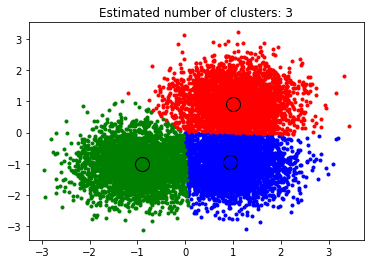

In [26]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
